In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# pip install yfinance pandas_datareader


In [10]:
# yf.pdr_override() 
#Get historical stock data 
symbol = "AAPL" 
start_date = "2020-01-01" 
end_date ="2021-01-01" 
stock_data = data = yf.download(symbol, start=start_date, end=end_date)
#Extract closing prices 
closing_prices = stock_data["Close"] 
#Divide data into training and testing sets 
train_data = closing_prices[:int(len(closing_prices) * 0.8)] 
test_data = closing_prices[int(len(closing_prices) * 0.8):] 
model = ARIMA(train_data,order=(1,2,1)) 
model_fit = model.fit() 
print("AIC: ",model_fit.aic) 
print("BIC: ",model_fit.bic)




[*********************100%***********************]  1 of 1 completed

AIC:  963.364657184901
BIC:  973.2596092845451



c:\Users\石天辰\.conda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\石天辰\.conda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\石天辰\.conda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 4.38097559135019


c:\Users\石天辰\.conda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\石天辰\.conda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


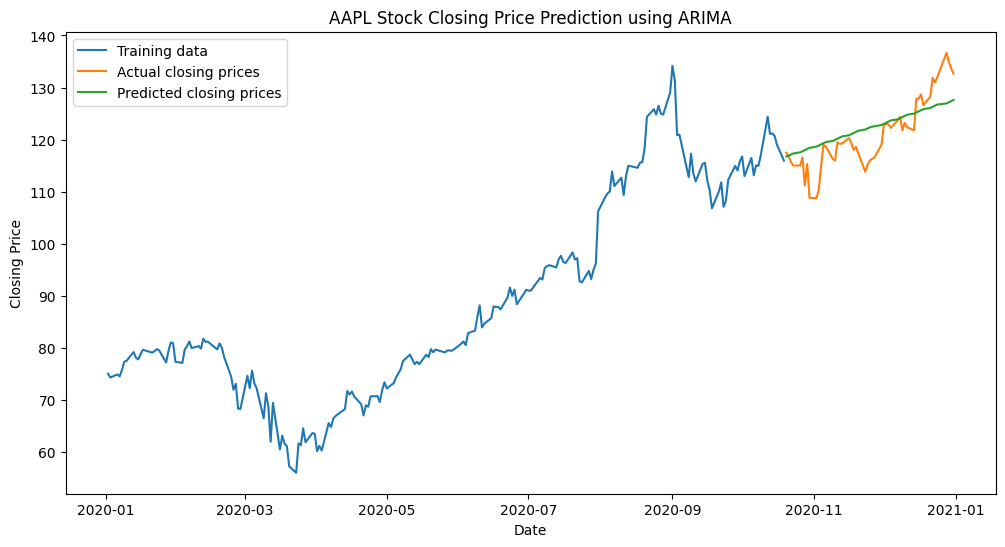

In [11]:
predictions = model_fit.forecast(steps=len(test_data)) 
rmse = sqrt(mean_squared_error(test_data,predictions)) 
print("RMSE:",rmse) 
plt.figure(figsize=(12,6)) 
plt.plot(train_data,label='Training data') 
plt.plot(test_data,label='Actual closing prices') 
plt.plot(test_data.index,predictions,label="Predicted closing prices") 
plt.xlabel("Date") 
plt.ylabel("Closing Price") 
plt.title(f"{symbol} Stock Closing Price Prediction using ARIMA") 
plt.legend() 
plt.show()

通过优化 ARIMA 模型的参数，可以提高模型的性能。在存在非平稳数据的情况下，需要最小 d 值为 1 的 ARIMA 模型。理想情况下，这应该在内部执行相同的差分过程！根据最低 AIC 值和最佳拆分百分比，下面的代码将数据划分为训练集和测试集。为了预测测试数据集的差异股票价格，确定了最佳 ARIMA 模型。

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [13]:
symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2021-01-01"
stock_data = yf.download(symbol,start=start_date,end=end_date) 
closing_prices = stock_data["Close"] 
train_data = closing_prices[:int(len(closing_prices) * 0.8)] 
test_data = closing_prices[int(len(closing_prices) * 0.8):] 
p_values = range(0, 5) 
d_values = range(0, 5) 
q_values = range(0, 5) 
pdq_combinations = list(itertools.product(p_values,d_values,q_values)) 
best_aic = float("inf") 
best_order = None 
best_model = None 
for order in pdq_combinations:
    try:
        model = ARIMA(train_data,order=order) 
        model_fit = model.fit() 
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic 
            best_order = order 
            best_model = model_fit 
    except Exception as e:
        print(f"Error fitting ARIMA model with order {order}") 
print(f"Optimal ARIMA order:{best_order}") 
print("AIC: ",best_aic) 
print("BIC: ",best_model.bic) 

[*********************100%***********************]  1 of 1 completed


Optimal ARIMA order:(3, 1, 2)
AIC:  955.5740685229025
BIC:  975.3938979712569


RMSE 8.150819813099414


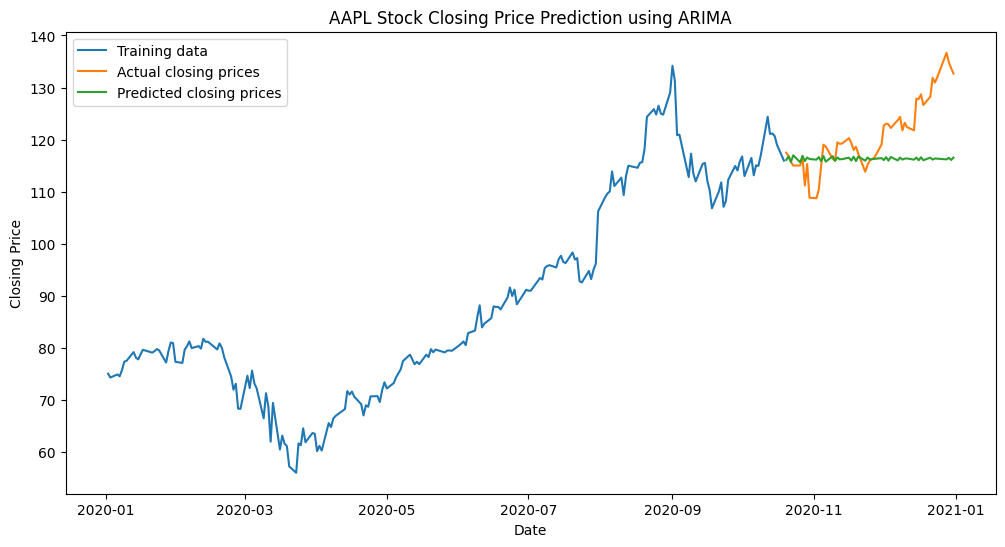

In [14]:
predictions = best_model.forecast(steps=len(test_data)) 
rmse = sqrt(mean_squared_error(test_data,predictions)) 
print("RMSE",rmse) 
plt.figure(figsize=(12,6)) 
plt.plot(train_data,label="Training data") 
plt.plot(test_data,label="Actual closing prices") 
plt.plot(test_data.index,predictions,label="Predicted closing prices") 
plt.xlabel("Date") 
plt.ylabel("Closing Price") 
plt.title(f"{symbol} Stock Closing Price Prediction using ARIMA") 
plt.legend() 
plt.show()

在下面的 Python 代码中，长短期记忆 （LSTM） 模型用于预测股票收盘价，并与 ARIMA 模型进行比较。如果尚未安装 TensorFlow 和 Keras 库，请安装它们。

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [16]:
symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2021-01-01"
stock_data = yf.download(symbol, start=start_date, end=end_date)
# Extract closing prices
closing_prices = stock_data["Close"]
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.values.reshape(-1, 1))
# Divide data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:, :]
test_data_index = closing_prices[train_size:].index
# Function to generate time series dataset for LSTM
def create_dataset(dataset, window_size=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - window_size - 1):
        data_x.append(dataset[i:(i + window_size), 0])
        data_y.append(dataset[i + window_size, 0])
    return np.array(data_x), np.array(data_y)
# Generate time series dataset for LSTM
window_size = 5
train_x, train_y = create_dataset(train_data, window_size)
test_x, test_y = create_dataset(test_data, window_size)
# Reshape input to [samples, time steps, features]
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
# Construct LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train LSTM model
model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=0)
# Make predictions with LSTM model
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)
# Revert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform([train_y])
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])
# Compute root mean squared error (RMSE) for LSTM
test_rmse = sqrt(mean_squared_error(test_y[0], test_predict[:, 0]))
print("LSTM Test RMSE: ", test_rmse)

[*********************100%***********************]  1 of 1 completed


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
LSTM Test RMSE:  2.552660233154112


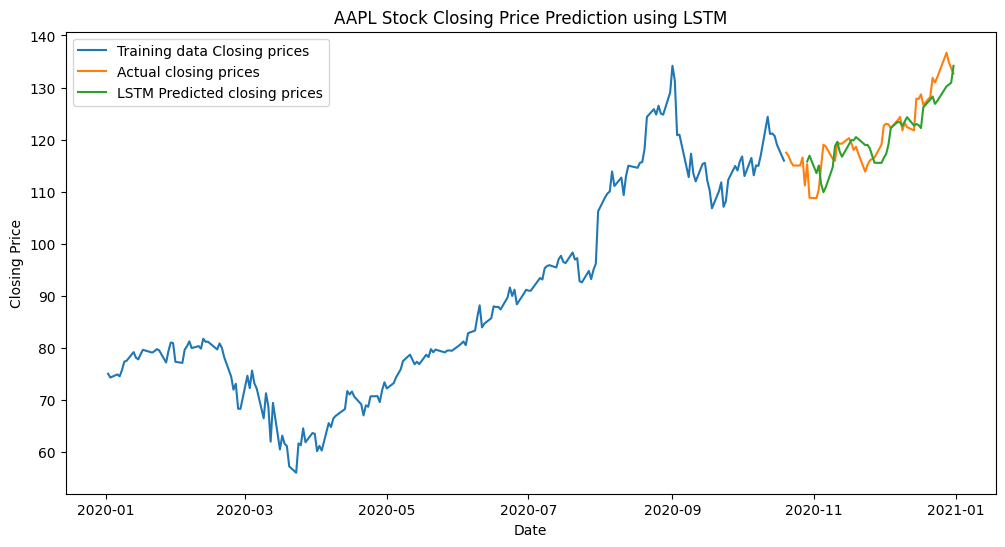

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(closing_prices[:-len(test_data_index)], label="Training data Closing prices")
plt.plot(closing_prices[-len(test_data_index):], label="Actual closing prices")
plt.plot(test_data_index[7:], test_predict[:-1], label="LSTM Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{symbol} Stock Closing Price Prediction using LSTM")
plt.legend()
plt.show()